In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers

In [4]:
df = pd.read_csv('/content/pamap2_HAR_raw.csv')

In [5]:
df=df.head(25000)
df.head()

,timestamp,heart_rate,IMU_hand_temperature,IMU_hand_3D_acceleration_1,IMU_hand_3D_acceleration_2,IMU_hand_3D_acceleration_3,IMU_hand_3D_acceleration_4,IMU_hand_3D_acceleration_5,IMU_hand_3D_acceleration_6,IMU_hand_3D_gyroscope_1,...,IMU_ankle_3D_gyroscope_3,IMU_ankle_3D_magnetometer_1,IMU_ankle_3D_magnetometer_2,IMU_ankle_3D_magnetometer_3,IMU_ankle_orientation_1,IMU_ankle_orientation_2,IMU_ankle_orientation_3,IMU_ankle_orientation_4,activityID,activity_name
0,0.00,2.0,3.000,4.00000,5.00000,6.00000,7.00000,8.00000,9.00000,10.000000,...,46.000000,47.0000,48.0000,49.0000,50.0,51.0,52.0,53.0,1,Lying
1,37.66,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,...,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0,1,Lying
2,37.67,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,...,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0,1,Lying
3,37.68,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,...,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0,1,Lying
4,37.69,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,...,0.026950,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0,1,Lying


In [6]:
df.describe()

,timestamp,heart_rate,IMU_hand_temperature,IMU_hand_3D_acceleration_1,IMU_hand_3D_acceleration_2,IMU_hand_3D_acceleration_3,IMU_hand_3D_acceleration_4,IMU_hand_3D_acceleration_5,IMU_hand_3D_acceleration_6,IMU_hand_3D_gyroscope_1,...,IMU_ankle_3D_gyroscope_2,IMU_ankle_3D_gyroscope_3,IMU_ankle_3D_magnetometer_1,IMU_ankle_3D_magnetometer_2,IMU_ankle_3D_magnetometer_3,IMU_ankle_orientation_1,IMU_ankle_orientation_2,IMU_ankle_orientation_3,IMU_ankle_orientation_4,activityID
count,25000.000000,2287.000000,24997.000000,24997.000000,24997.000000,24997.000000,24997.000000,24997.000000,24997.000000,24997.000000,...,24997.000000,24997.000000,24997.000000,24997.000000,24997.000000,24997.000000,24997.000000,24997.000000,24997.000000,25000.0
mean,162.643494,87.945343,31.233926,4.443440,2.474244,3.631801,4.480034,2.468255,3.769476,0.007949,...,-0.002106,0.011478,-19.588359,36.317452,1.904401,1.001960,0.002040,0.002080,0.002120,1.0
std,72.173228,7.520639,0.439316,3.094593,3.747164,5.785013,3.120743,3.739146,5.843022,0.271120,...,0.301210,0.334469,9.684293,18.850296,21.189988,0.309922,0.322572,0.328897,0.335222,0.0
min,0.000000,2.000000,3.000000,-14.090400,-9.313420,-15.184400,-14.050700,-9.329430,-14.993400,-3.250640,...,-1.152890,-1.024640,-117.268000,-57.557200,-60.519300,1.000000,0.000000,0.000000,0.000000,1.0
25%,100.147500,82.000000,30.937500,1.247890,1.228200,5.150830,1.287700,1.254490,5.281970,-0.018436,...,-0.021684,-0.009583,-20.217600,37.807600,-6.018060,1.000000,0.000000,0.000000,0.000000,1.0
50%,162.645000,86.000000,31.312500,5.976940,1.912230,6.261090,6.032940,1.845810,6.597490,0.001184,...,-0.005120,0.002438,-18.985400,44.322300,-2.516010,1.000000,0.000000,0.000000,0.000000,1.0
75%,225.142500,91.000000,31.562500,7.145550,5.623690,6.532970,7.228940,5.669150,6.748510,0.021286,...,0.011920,0.014430,-14.336900,44.852400,0.324129,1.000000,0.000000,0.000000,0.000000,1.0
max,287.640000,107.000000,31.875000,11.707600,13.514400,10.436800,11.751600,13.375300,10.442800,10.000000,...,45.000000,46.000000,47.000000,48.000000,49.000000,50.000000,51.000000,52.000000,53.000000,1.0


In [7]:
sensor_columns = [col for col in df.columns if col not in ['timestamp', 'activityID', 'activity_name']]
sensor_data = df[sensor_columns]

In [8]:
#Linear Interpolation, Feature Engineering and Dropping NANs
sensor_data = sensor_data.interpolate(method='linear', axis=0)
sensor_data = sensor_data.dropna()

sensor_data['hand_acc_magnitude'] = np.sqrt(
    sensor_data['IMU_hand_3D_acceleration_1']**2 +
    sensor_data['IMU_hand_3D_acceleration_2']**2 +
    sensor_data['IMU_hand_3D_acceleration_3']**2
)
sensor_data['chest_acc_magnitude'] = np.sqrt(
    sensor_data['IMU_chest_3D_acceleration_1']**2 +
    sensor_data['IMU_chest_3D_acceleration_2']**2 +
    sensor_data['IMU_chest_3D_acceleration_3']**2
)
sensor_data['chest_gyro_magnitude'] = np.sqrt(
    sensor_data['IMU_chest_3D_gyroscope_1']**2 +
    sensor_data['IMU_chest_3D_gyroscope_2']**2 +
    sensor_data['IMU_chest_3D_gyroscope_3']**2
)
sensor_data['chest_mag_magnitude'] = np.sqrt(
    sensor_data['IMU_chest_3D_magnetometer_1']**2 +
    sensor_data['IMU_chest_3D_magnetometer_2']**2 +
    sensor_data['IMU_chest_3D_magnetometer_3']**2
)
sensor_data['ankle_acc_magnitude'] = np.sqrt(
    sensor_data['IMU_ankle_3D_acceleration_1']**2 +
    sensor_data['IMU_ankle_3D_acceleration_2']**2 +
    sensor_data['IMU_ankle_3D_acceleration_3']**2
)
sensor_data['ankle_gyro_magnitude'] = np.sqrt(
    sensor_data['IMU_ankle_3D_gyroscope_1']**2 +
    sensor_data['IMU_ankle_3D_gyroscope_2']**2 +
    sensor_data['IMU_ankle_3D_gyroscope_3']**2
)
sensor_data['ankle_mag_magnitude'] = np.sqrt(
    sensor_data['IMU_ankle_3D_magnetometer_1']**2 +
    sensor_data['IMU_ankle_3D_magnetometer_2']**2 +
    sensor_data['IMU_ankle_3D_magnetometer_3']**2
)
sensor_data['hand_acc_magnitude_4_6'] = np.sqrt(
    sensor_data['IMU_hand_3D_acceleration_4']**2 +
    sensor_data['IMU_hand_3D_acceleration_5']**2 +
    sensor_data['IMU_hand_3D_acceleration_6']**2
)
sensor_data['hand_gyro_magnitude'] = np.sqrt(
    sensor_data['IMU_hand_3D_gyroscope_1']**2 +
    sensor_data['IMU_hand_3D_gyroscope_2']**2 +
    sensor_data['IMU_hand_3D_gyroscope_3']**2
)
sensor_data['hand_mag_magnitude'] = np.sqrt(
    sensor_data['IMU_hand_3D_magnetometer_1']**2 +
    sensor_data['IMU_hand_3D_magnetometer_2']**2 +
    sensor_data['IMU_hand_3D_magnetometer_3']**2
)
sensor_data['chest_acc_magnitude_4_6'] = np.sqrt(
    sensor_data['IMU_chest_3D_acceleration_4']**2 +
    sensor_data['IMU_chest_3D_acceleration_5']**2 +
    sensor_data['IMU_chest_3D_acceleration_6']**2
)
sensor_data['ankle_acc_magnitude_4_6'] = np.sqrt(
    sensor_data['IMU_ankle_3D_acceleration_4']**2 +
    sensor_data['IMU_ankle_3D_acceleration_5']**2 +
    sensor_data['IMU_ankle_3D_acceleration_6']**2
)

In [9]:
cols_to_drop = [
    'IMU_chest_3D_acceleration_1','IMU_chest_3D_acceleration_2','IMU_chest_3D_acceleration_3',
    'IMU_chest_3D_acceleration_4','IMU_chest_3D_acceleration_5','IMU_chest_3D_acceleration_6',
    'IMU_hand_3D_acceleration_1','IMU_hand_3D_acceleration_2','IMU_hand_3D_acceleration_3',
    'IMU_hand_3D_acceleration_4','IMU_hand_3D_acceleration_5','IMU_hand_3D_acceleration_6',
    'IMU_chest_3D_gyroscope_1','IMU_chest_3D_gyroscope_2','IMU_chest_3D_gyroscope_3',
    'IMU_hand_3D_gyroscope_1','IMU_hand_3D_gyroscope_2','IMU_hand_3D_gyroscope_3',
    'IMU_chest_3D_magnetometer_1','IMU_chest_3D_magnetometer_2','IMU_chest_3D_magnetometer_3',
    'IMU_ankle_3D_acceleration_1','IMU_ankle_3D_acceleration_2','IMU_ankle_3D_acceleration_3',
    'IMU_ankle_3D_acceleration_4','IMU_ankle_3D_acceleration_5','IMU_ankle_3D_acceleration_6',
    'IMU_ankle_3D_gyroscope_1','IMU_ankle_3D_gyroscope_2','IMU_ankle_3D_gyroscope_3',
    'IMU_ankle_3D_magnetometer_1','IMU_ankle_3D_magnetometer_2','IMU_ankle_3D_magnetometer_3',
    'IMU_hand_3D_magnetometer_1','IMU_hand_3D_magnetometer_2','IMU_hand_3D_magnetometer_3'
]
sensor_data = sensor_data.drop(cols_to_drop, axis=1)

scaler = MinMaxScaler()
sensor_data_scaled = scaler.fit_transform(sensor_data)
sensor_data_scaled = pd.DataFrame(sensor_data_scaled, columns=sensor_data.columns)

sensor_data_scaled['timestamp'] = df['timestamp']
sensor_data_scaled['activityID'] = df['activityID']
sensor_data_scaled['activity_name'] = df['activity_name']

threshold_time = df['timestamp'].quantile(0.8)
support_set = sensor_data_scaled[sensor_data_scaled['timestamp'] < threshold_time]
query_set = sensor_data_scaled[sensor_data_scaled['timestamp'] >= threshold_time]

def drop_id_columns(df_):
    return df_.drop(['timestamp','activityID','activity_name'], axis=1)

support_features = drop_id_columns(support_set)
query_features = drop_id_columns(query_set)

In [10]:
sensor_data_scaled.head()

,heart_rate,IMU_hand_temperature,IMU_hand_orientation_1,IMU_hand_orientation_2,IMU_hand_orientation_3,IMU_hand_orientation_4,IMU_chest_temperature,IMU_chest_orientation_1,IMU_chest_orientation_2,IMU_chest_orientation_3,...,ankle_gyro_magnitude,ankle_mag_magnitude,hand_acc_magnitude_4_6,hand_gyro_magnitude,hand_mag_magnitude,chest_acc_magnitude_4_6,ankle_acc_magnitude_4_6,timestamp,activityID,activity_name
0,0.000000,0.000000,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,1.0,...,1.000000,0.462071,0.757298,1.000000,0.000000,1.000000,1.000000,0.00,1,Lying
1,0.186667,0.948052,0.0,0.0,0.0,0.0,0.894495,0.0,0.0,0.0,...,0.000345,0.571266,0.473347,0.002001,0.992089,0.100956,0.053396,37.66,1,Lying
2,0.373333,0.948052,0.0,0.0,0.0,0.0,0.894495,0.0,0.0,0.0,...,0.000266,0.566892,0.446982,0.009035,1.000000,0.101751,0.052682,37.67,1,Lying
3,0.560000,0.948052,0.0,0.0,0.0,0.0,0.894495,0.0,0.0,0.0,...,0.000801,0.561847,0.414937,0.012419,0.979029,0.102318,0.052919,37.68,1,Lying
4,0.746667,0.948052,0.0,0.0,0.0,0.0,0.894495,0.0,0.0,0.0,...,0.000580,0.565944,0.392313,0.010106,0.988483,0.102108,0.052794,37.69,1,Lying


In [11]:
sensor_data_scaled.describe()

,heart_rate,IMU_hand_temperature,IMU_hand_orientation_1,IMU_hand_orientation_2,IMU_hand_orientation_3,IMU_hand_orientation_4,IMU_chest_temperature,IMU_chest_orientation_1,IMU_chest_orientation_2,IMU_chest_orientation_3,...,ankle_acc_magnitude,ankle_gyro_magnitude,ankle_mag_magnitude,hand_acc_magnitude_4_6,hand_gyro_magnitude,hand_mag_magnitude,chest_acc_magnitude_4_6,ankle_acc_magnitude_4_6,timestamp,activityID
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.0
mean,0.818783,0.977799,0.000040,0.000040,0.000040,0.000040,0.956248,0.000040,0.000040,0.000040,...,0.052428,0.001122,0.063977,0.417909,0.008524,0.744718,0.100168,0.054715,162.643494,1.0
std,0.069914,0.015214,0.006325,0.006325,0.006325,0.006325,0.029401,0.006325,0.006325,0.006325,...,0.008933,0.007035,0.112652,0.033672,0.024525,0.083075,0.008500,0.008291,72.173228,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.761905,0.967532,0.000000,0.000000,0.000000,0.000000,0.931193,0.000000,0.000000,0.000000,...,0.051233,0.000310,0.032029,0.412914,0.001254,0.714116,0.098363,0.054084,100.147500,1.0
50%,0.800000,0.980519,0.000000,0.000000,0.000000,0.000000,0.958716,0.000000,0.000000,0.000000,...,0.052464,0.000451,0.039013,0.416667,0.001850,0.757287,0.100201,0.054670,162.645000,1.0
75%,0.847619,0.989177,0.000000,0.000000,0.000000,0.000000,0.981651,0.000000,0.000000,0.000000,...,0.053445,0.000633,0.049515,0.421496,0.002762,0.801568,0.101675,0.055153,225.142500,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,287.640000,1.0


In [12]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data.iloc[i:i+seq_length].values)
    return np.array(sequences)

seq_length = 30
X_train = create_sequences(support_features, seq_length)
X_test = create_sequences(query_features, seq_length)

# CNN AutoEncoder

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0437 - val_loss: 0.0012
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 6.5861e-04 - val_loss: 6.9323e-04
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 2.8939e-04 - val_loss: 6.3565e-04
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.0545e-04 - val_loss: 4.0720e-04
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.4638e-04 - val_loss: 3.5563e-04
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1.2383e-04 - val_loss: 3.3952e-04
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1.0713e-04 - val_loss: 3.3137e-04
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 9.8558e-05 - val_loss: 3.1230e-04
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 9.0550e-05 - val_loss: 3.2221e-04
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 8.6939e-05 - val_loss: 2.9061e-04
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 8.4407

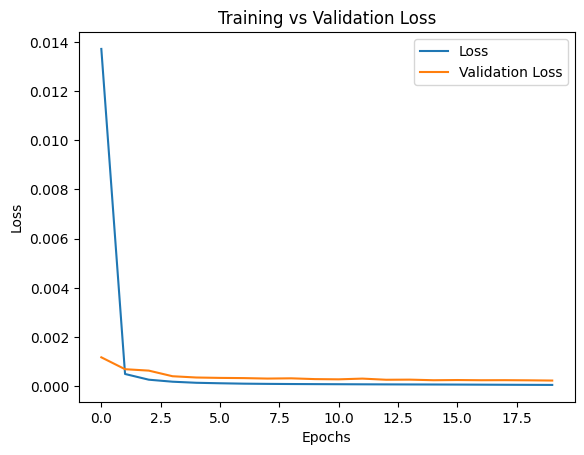

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv1D, MaxPooling1D, UpSampling1D

def build_cnn_autoencoder(input_shape):
    model = tf.keras.Sequential([
        Conv1D(32, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
        MaxPooling1D(pool_size=2, padding='same'),
        Conv1D(16, kernel_size=3, activation='relu', padding='same'),
        UpSampling1D(size=2),
        Conv1D(input_shape[-1], kernel_size=3, activation='sigmoid', padding='same')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

cnn_autoencoder = build_cnn_autoencoder((X_train.shape[1], X_train.shape[2]))

# Train the model and store the history
history = cnn_autoencoder.fit(X_train, X_train, epochs=20, batch_size=32, validation_split=0.2)

# Plot loss and validation loss
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [15]:
#Results
X_test_pred = cnn_autoencoder.predict(X_test)
reconstruction_error = np.mean(np.abs(X_test_pred - X_test), axis=(1,2))
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold

print(f"Detected {np.sum(anomalies)} anomalies in the test set.")

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Detected 249 anomalies in the test set.


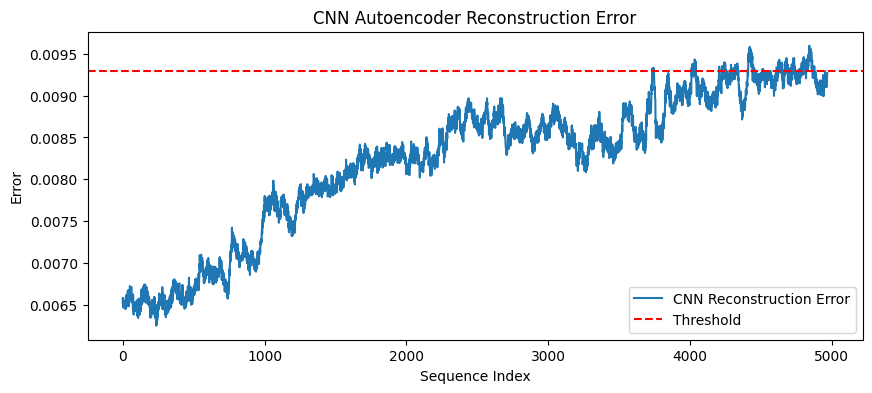

In [16]:
#Plots
plt.figure(figsize=(10, 4))
plt.plot(reconstruction_error, label='CNN Reconstruction Error')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('CNN Autoencoder Reconstruction Error')
plt.xlabel('Sequence Index')
plt.ylabel('Error')
plt.legend()
plt.show()